In [61]:
import numpy as np
import pandas as pd
from astropy.table import Table
import collections
from spec_tools import Source_present, Likelihood_contours, Scale_model
# from spec_exam import Gen_spec,Calzetti
from C_full_fit import Gen_spec
from matplotlib import gridspec
from astropy.io import fits
from astropy import wcs
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.interpolate import interp1d
from glob import glob
import seaborn as sea
from grizli import model as griz_model

import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
R = robjects.r
pandas2ri.activate()

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

In [18]:
def Smooth(f,x):
    ksmooth = importr('KernSmooth')

    ### select bandwidth
    H = ksmooth.dpik(x)
    fx = ksmooth.locpoly(x,f,bandwidth = H)
    X = np.array(fx[0])
    iFX = np.array(fx[1])
    return interp1d(X,iFX)(x)

In [58]:
metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
# age=np.round(np.arange(.5,4.1,.1),1)

tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
z = np.arange(1.55,1.65,0.0005)
dust = np.arange(0,1.1,.01)
M,A=np.meshgrid(metal,age)

In [8]:
sp_ids = glob('../spec_files/*g102.npy*')

In [21]:
ls ../spec_files/

GND_21427_g102.npy   GSD_40223_g102.npy   GSD_41886_g102.npy
GND_21427_g141.npy   GSD_40223_g141.npy   GSD_41886_g141.npy
GSD_26272_g102.npy   GSD_40623_g102.npy   GSD_42113_g102.npy
GSD_26272_g141.npy   GSD_40623_g141.npy   GSD_42113_g141.npy
GSD_39012_g102.npy   GSD_41148_g102.npy   GSD_44042_g102.npy
GSD_39012_g141.npy   GSD_41148_g141.npy   GSD_44042_g141.npy
GSD_39170_g102.npy   GSD_41520_g102.npy   g102_21156_test.npy
GSD_39170_g141.npy   GSD_41520_g141.npy   g141_21156_test.npy


In [13]:
sp_ids = [int(U.split('_')[2]) for U in sp_ids]

In [3]:
PB = np.load('../data/posteriors/fit_test_tZ_g102_pos.npy')
Z,PZB = np.load('../data/posteriors/fit_test_Z_g102_pos.npy')
t,PtB = np.load('../data/posteriors/fit_test_t_g102_pos.npy')
ultau,PtauB = np.load('../data/posteriors/fit_test_tau_g102_pos.npy')
z,PzB = np.load('../data/posteriors/fit_test_rs_g102_pos.npy')
d,PdB = np.load('../data/posteriors/fit_test_d_g102_pos.npy')

In [4]:
P = np.load('../data/posteriors/fit_test_41520_tZ_pos.npy')
Z,PZ = np.load('../data/posteriors/fit_test_41520_Z_pos.npy')
t,Pt = np.load('../data/posteriors/fit_test_41520_t_pos.npy')
ultau,Ptau = np.load('../data/posteriors/fit_test_41520_tau_pos.npy')
z,Pz = np.load('../data/posteriors/fit_test_41520_rs_pos.npy')
d,Pd = np.load('../data/posteriors/fit_test_41520_d_pos.npy')

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


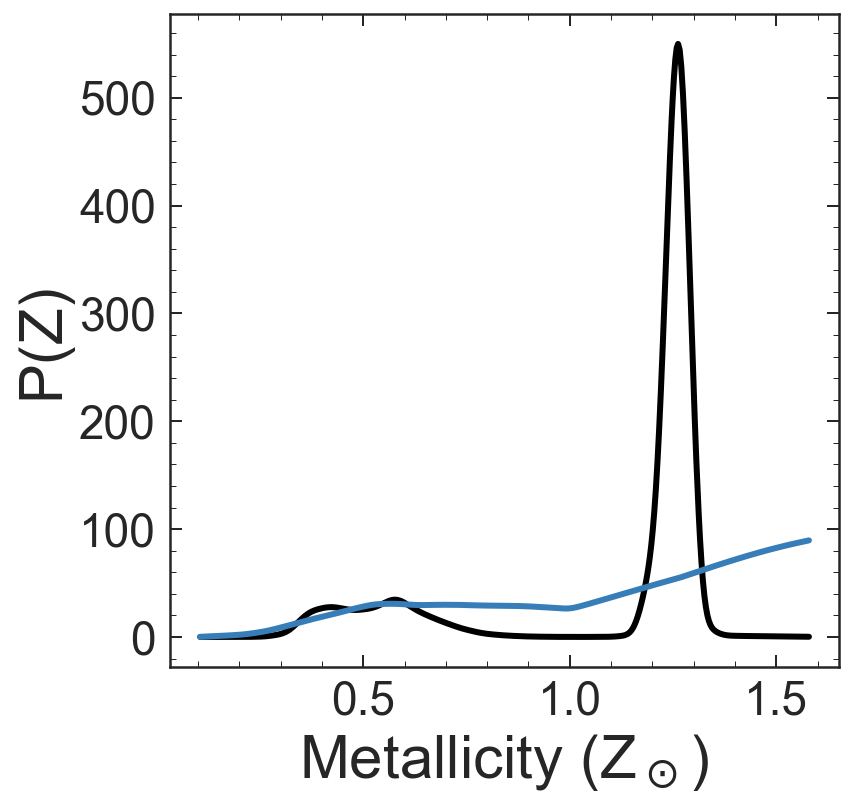

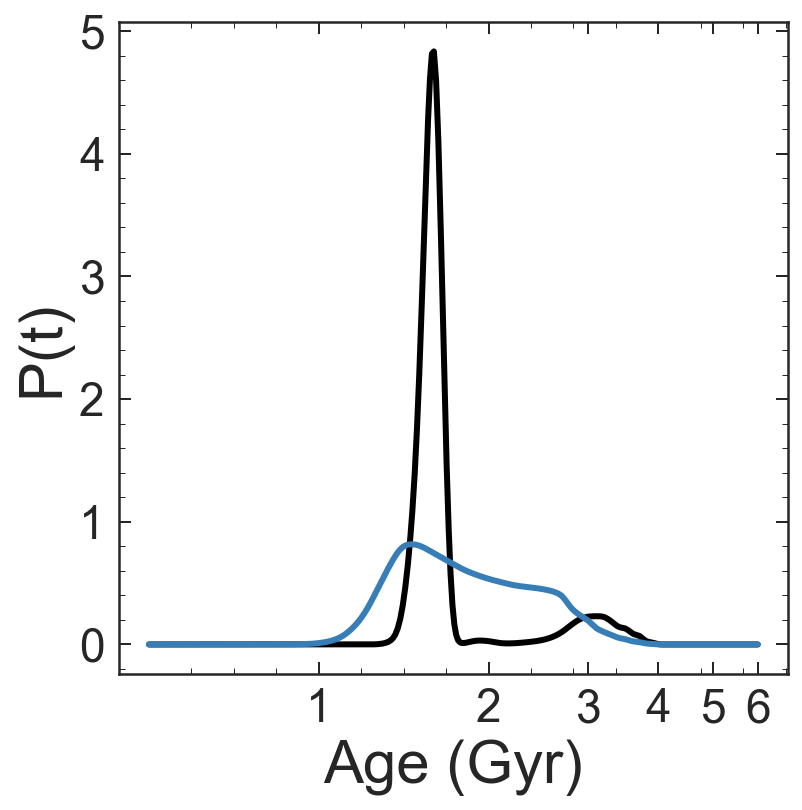

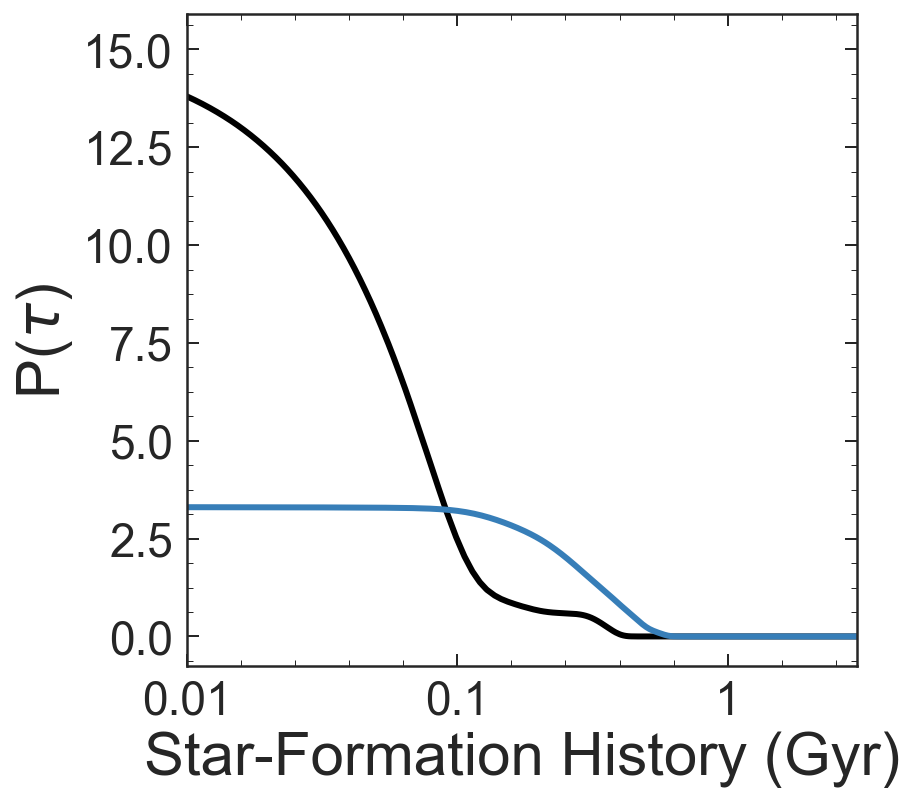

In [56]:
plt.figure(figsize=[6,6])
plt.plot(np.arange(min(Z/0.019),max(Z/0.019),0.00001), Smooth(interp1d(Z/0.019, PZ)(np.arange(min(Z/0.019),max(Z/0.019),0.00001)), 
                                              np.arange(min(Z/0.019),max(Z/0.019),0.00001) ),'k',linewidth=3)
plt.plot(np.arange(min(Z/0.019),max(Z/0.019),0.00001), Smooth(interp1d(Z/0.019, PZB)(np.arange(min(Z/0.019),max(Z/0.019),0.00001)), 
                                              np.arange(min(Z/0.019),max(Z/0.019),0.00001) ),color='#377eb8',linewidth=3)
plt.ylabel('P(Z)',fontsize=30)
plt.xlabel('Metallicity (Z$_\odot$)',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.savefig('../plots/metallicity_compare.png',bbox_inches = 'tight')

plt.figure(figsize=[6,6])
plt.plot(np.log10(np.arange(min(t),max(t),0.00001)), Smooth(interp1d(t, Pt)(np.arange(min(t),max(t),0.00001)), 
                                              np.arange(min(t),max(t),0.00001) ),'k',linewidth=3)
plt.plot(np.log10(np.arange(min(t),max(t),0.00001)), Smooth(interp1d(t, PtB)(np.arange(min(t),max(t),0.00001)), 
                                              np.arange(min(t),max(t),0.00001) ),color='#377eb8',linewidth=3)
plt.ylabel('P(t)',fontsize=30)
plt.xlabel('Age (Gyr)',fontsize=30)
plt.xticks(np.log10([1,2,3,4,5,6]),[1,2,3,4,5,6])
plt.tick_params(axis='both', which='major', labelsize=23)
plt.savefig('../plots/age_compare.png',bbox_inches = 'tight')

plt.figure(figsize=[6,6])
plt.plot(np.log10(np.arange(min(ultau),max(ultau),0.00001)), Smooth(interp1d(ultau, Ptau)(np.arange(min(ultau),max(ultau),0.00001)), 
                                              np.arange(min(ultau),max(ultau),0.00001) ),'k',linewidth=3)
plt.plot(np.log10(np.arange(min(ultau),max(ultau),0.00001)), Smooth(interp1d(ultau, PtauB)(np.arange(min(ultau),max(ultau),0.00001)), 
                                              np.arange(min(ultau),max(ultau),0.00001) ),color='#377eb8',linewidth=3)
plt.ylabel('P($\\tau$)',fontsize=30)
plt.xlabel('Star-Formation History (Gyr)',fontsize=30)
plt.xticks(np.log10([0.001,0.01,0.1,1]),[0.001,0.01,0.1,1])
plt.xlim(-2,np.log10(3))
plt.tick_params(axis='both', which='major', labelsize=23)
plt.savefig('../plots/sfh_compare.png',bbox_inches = 'tight')

# plt.figure(figsize=[6,6])
# plt.plot(z,Pz)
# plt.title(z[Pz==max(Pz)])

# plt.figure(figsize=[6,6])
# plt.plot(d,Pd)
# plt.title(d[Pd==max(Pd)])



/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


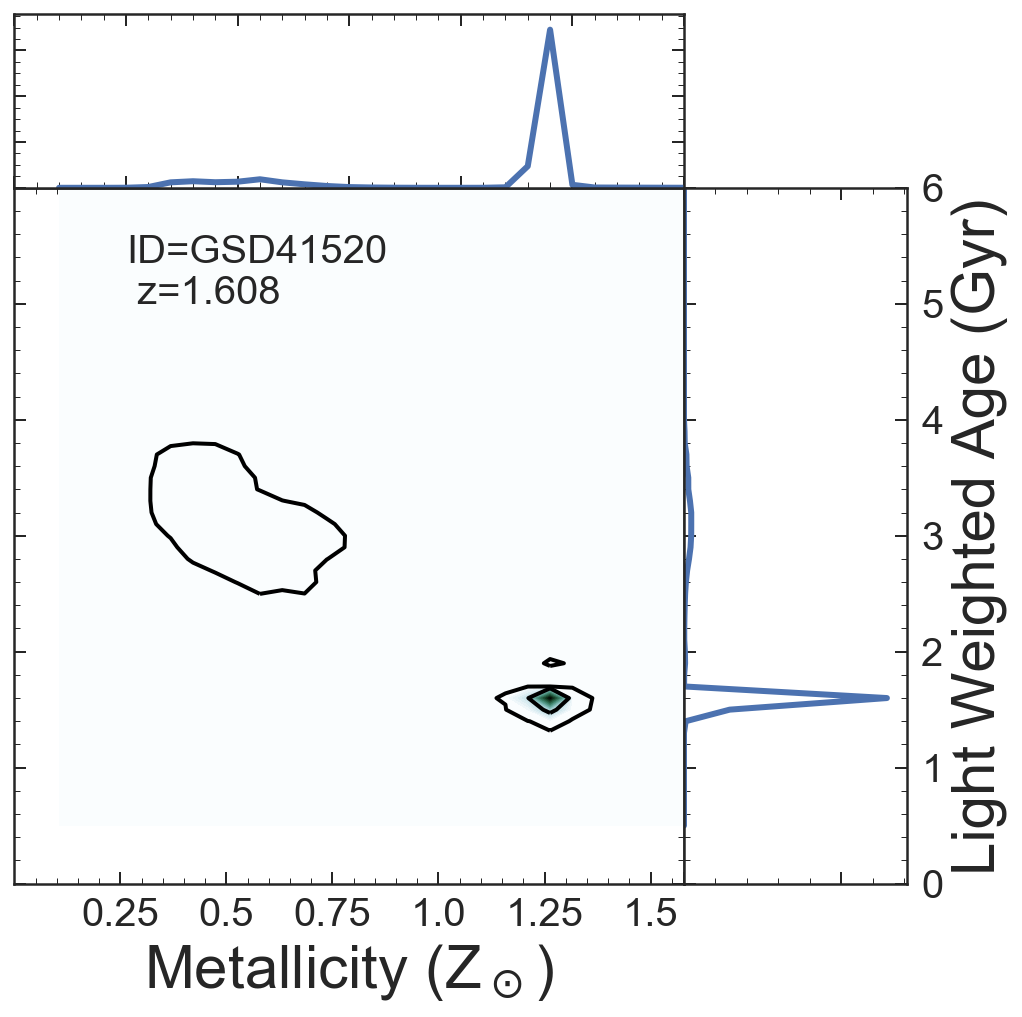

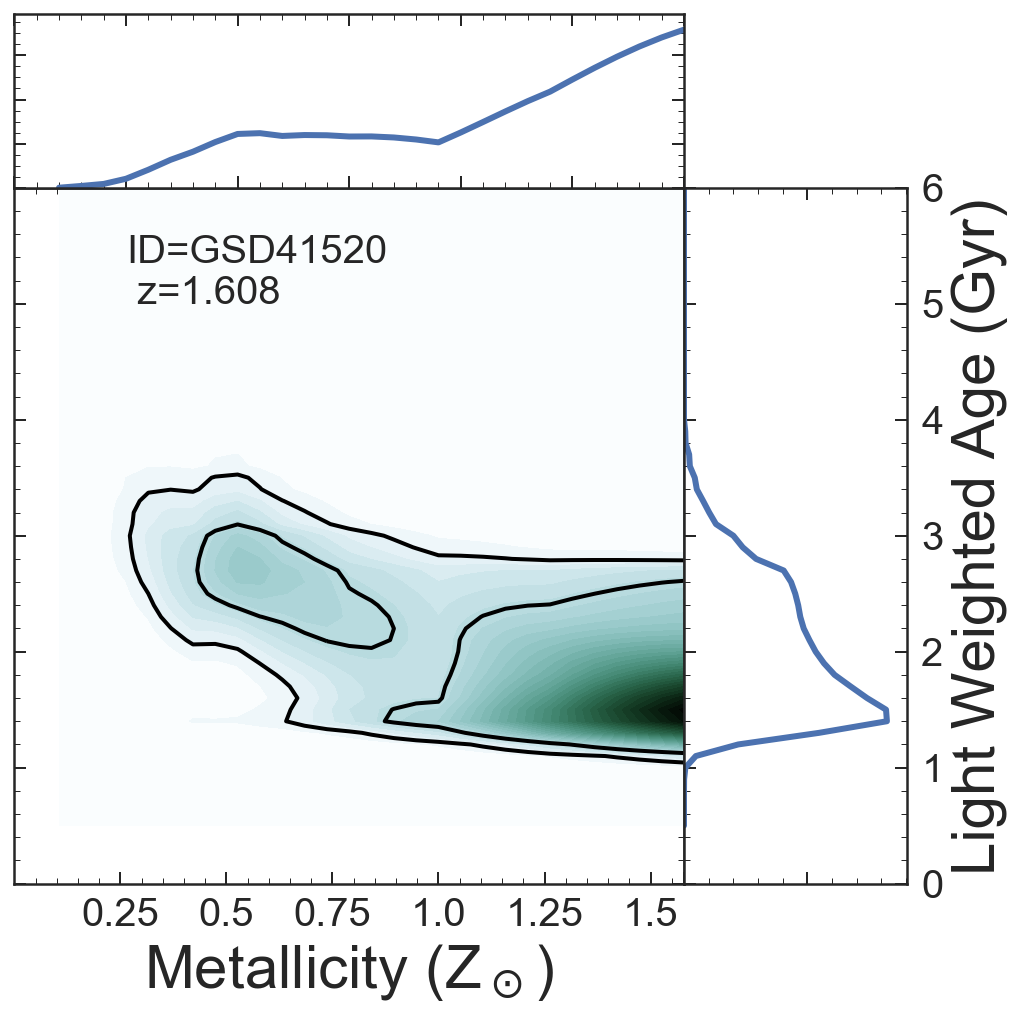

In [69]:
ones,twos = Likelihood_contours(age,metal,P)
levels = np.array([twos,ones])

ones,twos = Likelihood_contours(age,metal,PB)
levelsB = np.array([twos,ones])

gs = GridSpec(2,2,height_ratios=[1,4],width_ratios=[3,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])


plt.subplot(gs[1,0])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,6])
plt.xlabel('Metallicity (Z$_\odot$)',size=30)
# plt.ylabel('Light Weighted Age (Gyr)',size=35)
plt.gca().tick_params(axis='y',labelleft='off')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
plt.text(.005,5,'ID=GSD41520\n z=1.608', fontsize=20)

plt.subplot(gs[0,0])
plt.plot(Z,PZ,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off')
plt.gca().tick_params(axis='x',labelbottom='off')
plt.xlim(0,0.03)
plt.ylim(0,max(PZ)*1.1)

ax = plt.subplot(gs[1,1])
plt.plot(Pt,t,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off',labelright='on')
plt.ylabel('Light Weighted Age (Gyr)',size=30)
ax.yaxis.set_label_position("right")
plt.gca().tick_params(axis='x',labelbottom='off')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0,6)
plt.xlim(0,max(Pt)*1.1)
plt.savefig('../plots/41520_lh_allfit.png',bbox_inches = 'tight')

gs = GridSpec(2,2,height_ratios=[1,4],width_ratios=[3,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])


plt.subplot(gs[1,0])
plt.contour(M,A,PB,levelsB,colors='k',linewidths=2)
plt.contourf(M,A,PB,40,cmap=cmap)
plt.axis([0,0.03,0,6])
plt.xlabel('Metallicity (Z$_\odot$)',size=30)
# plt.ylabel('Light Weighted Age (Gyr)',size=35)
plt.gca().tick_params(axis='y',labelleft='off')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
plt.text(.005,5,'ID=GSD41520\n z=1.608', fontsize=20)

plt.subplot(gs[0,0])
plt.plot(Z,PZB,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off')
plt.gca().tick_params(axis='x',labelbottom='off')
plt.xlim(0,0.03)
plt.ylim(0,max(PZB)*1.1)

ax = plt.subplot(gs[1,1])
plt.plot(PtB,t,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off',labelright='on')
plt.ylabel('Light Weighted Age (Gyr)',size=30)
ax.yaxis.set_label_position("right")
plt.gca().tick_params(axis='x',labelbottom='off')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0,6)
plt.xlim(0,max(PtB)*1.1)
plt.savefig('../plots/41520_lh_g102fit.png',bbox_inches = 'tight')


In [124]:
sp  = Gen_spec('GSD',41520,1.608,'../beams/o173_4_41520.g102.A.fits','../beams/o230_41520.g141.A.fits',
               g102_lims=[8400,11300], g141_lims = [11100,16000],phot_tmp_err = True)
sp.Sim_all(0.024,1.6,0,Av=0.1)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

(3, 4.698970004336019)

<Figure size 1080x576 with 0 Axes>

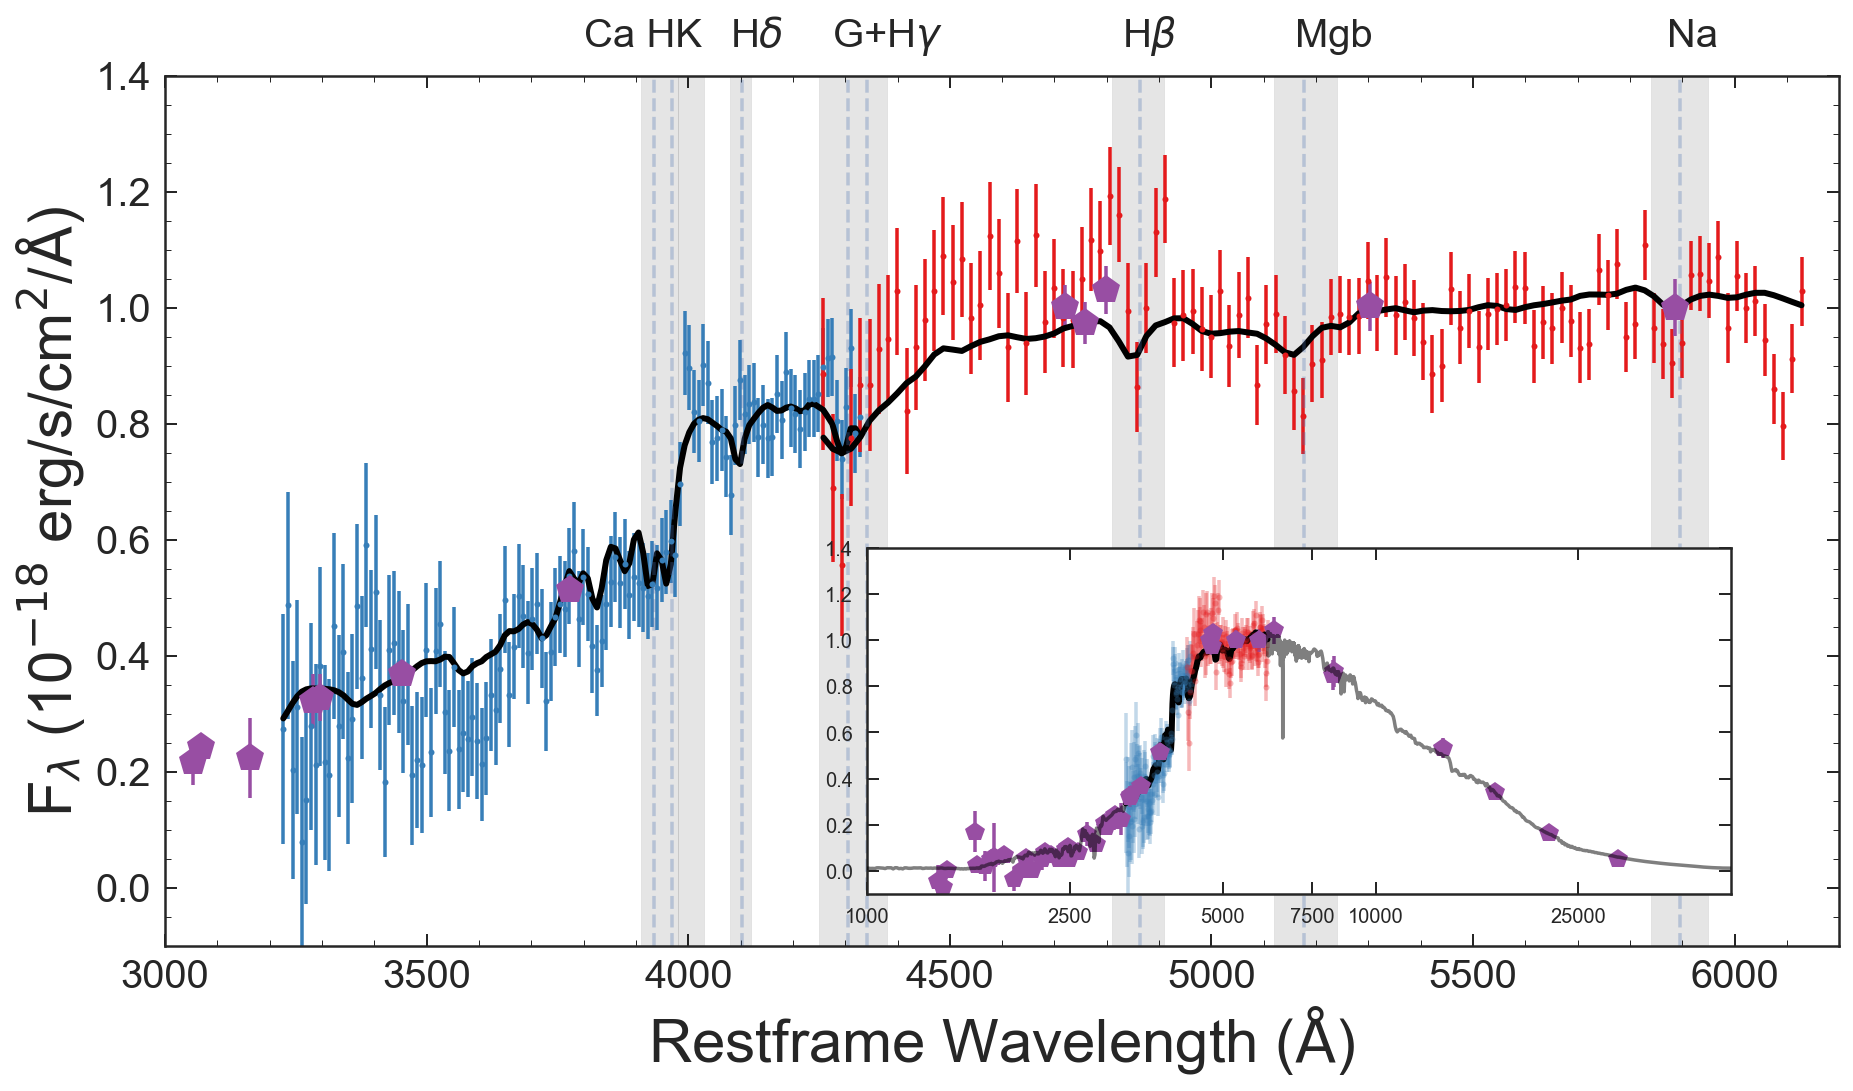

In [223]:
wv,fl = np.load(hpath + 'fsps_models_for_fit/fsps_spec/m0.002_a4.2_dt0_spec.npy')
cal = Calzetti(0.6,wv)
plt.figure(figsize=[15,8])
plt.rcParams["figure.figsize"] = (15,8)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
fig,ax1 = plt.subplots()
left, bottom, width, height = [0.45, 0.17, 0.4, 0.3]

ax1.errorbar(sp.Bwv_rf,sp.Bflx*1E18,sp.Berr*1E18,
            linestyle='None', marker='o', markersize=3, color='#377eb8')
ax1.errorbar(sp.Rwv_rf,sp.Rflx*1E18,sp.Rerr*1E18,
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
ax1.plot(sp.Bwv_rf,sp.Bmfl*1E18,'k',linewidth=3)
ax1.plot(sp.Rwv_rf,sp.Rmfl*1E18,'k',linewidth=3)
ax1.errorbar(sp.Pwv_rf,sp.Pflx*1E18,sp.Perr*1E18,
                             linestyle='None', marker='p', markersize=15, color='#984ea3')
# ax1.plot(sp.Pwv_rf,sp.Pmfl,'ko',ms=15,zorder =5)

ax1.set_ylim(-.1,1.4)
ax1.set_xlim(3000,6200)
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=30)
plt.xlabel('Restframe Wavelength ($\\rm \AA$)',size=30)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvline(5895.6,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.axvspan(5840, 5950, color='k', alpha=.1)
plt.text(3800,1.45,'Ca HK',fontsize=20)
plt.text(4080,1.45,'H$\delta$',fontsize=20)
plt.text(4275,1.45,'G+H$\gamma$',fontsize=20)
plt.text(4830,1.45,'H$\\beta$',fontsize=20)
plt.text(5160,1.45,'Mgb',fontsize=20)
plt.text(5870,1.45,'Na',fontsize=20)

ax2 = fig.add_axes([left, bottom, width, height])
ax2.errorbar(np.log10(sp.Bwv_rf),sp.Bflx*1E18,sp.Berr*1E18,
            linestyle='None', marker='o', markersize=3, color='#377eb8', alpha=.3)
ax2.errorbar(np.log10(sp.Rwv_rf),sp.Rflx*1E18,sp.Rerr*1E18,
            linestyle='None', marker='o', markersize=3, color='#e41a1c', alpha=.3)

ax2.errorbar(np.log10(sp.Pwv_rf),sp.Pflx*1E18,sp.Perr*1E18,
                             linestyle='None', marker='p', markersize=10, color='#984ea3')

IDb = [U for U in range(len(wv)) if wv[U] < sp.Bwv_rf[0]]
IDr = [U for U in range(len(wv)) if wv[U] > sp.Rwv_rf[-1]]

ax2.plot(np.log10(wv[IDb]),sp.PC*fl[IDb]*1E18*cal[IDb],'k',ms=10,zorder =5,alpha=0.5)
ax2.plot(np.log10(wv[IDr]),sp.PC*fl[IDr]*1E18*cal[IDr],'k',ms=10,zorder =5,alpha=0.5)

ax2.plot(np.log10(sp.Bwv_rf),sp.Bmfl*1E18,'k',linewidth=3)
ax2.plot(np.log10(sp.Rwv_rf),sp.Rmfl*1E18,'k',linewidth=3)

plt.xticks(np.log10([1000,2500,5000,7500,10000,25000]),[1000,2500,5000,7500,10000,25000])
ax2.minorticks_off()
ax2.set_ylim(-.1,1.4)
ax2.set_xlim(3,np.log10(50000))
# plt.savefig('../plots/test_41520_fit.png',bbox_inches = 'tight')

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


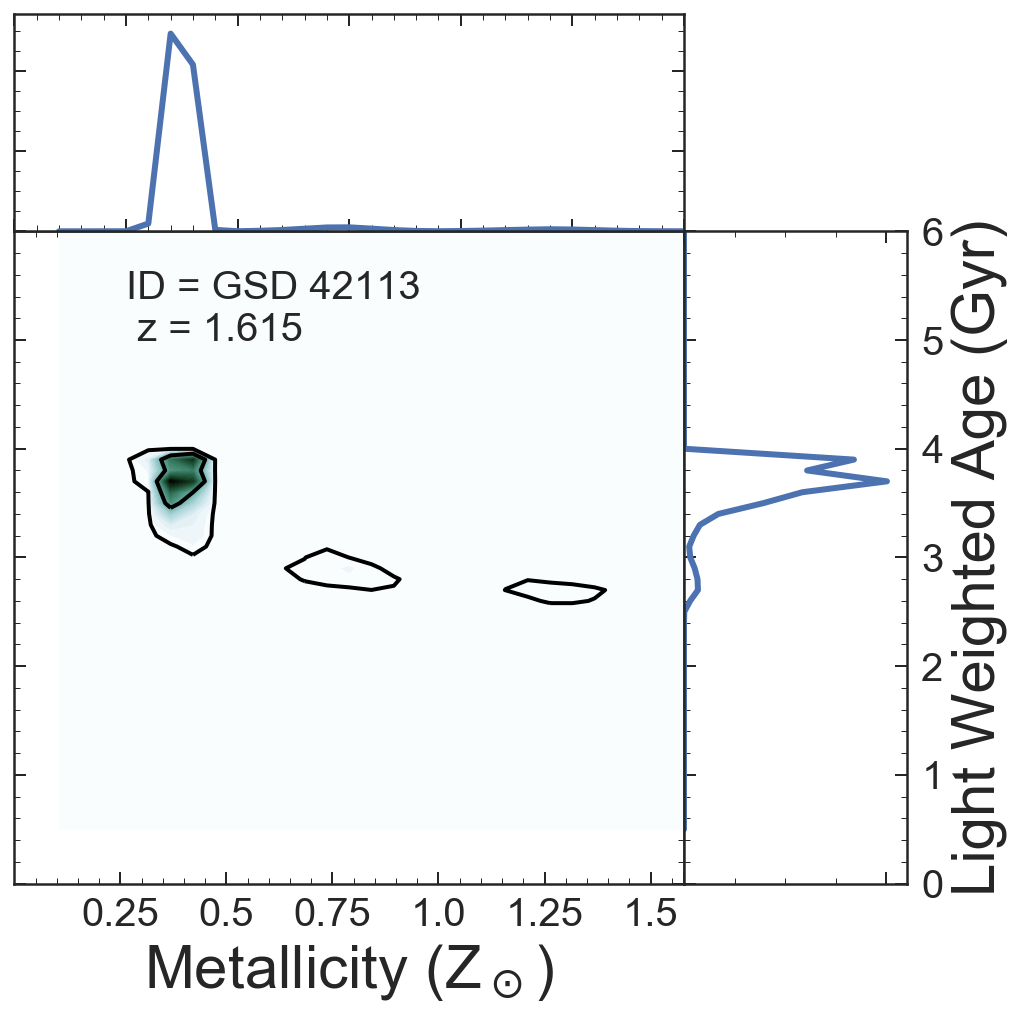

In [103]:
gs = gridspec.GridSpec(2,2,height_ratios=[1,3],width_ratios=[3,1],hspace=0,wspace=0)

plt.figure(figsize=[8,8])
plt.subplot(gs[1,0])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,6])
plt.xlabel('Metallicity (Z$_\odot$)',size=30)
# plt.ylabel('Light Weighted Age (Gyr)',size=35)
plt.gca().tick_params(axis='y',labelleft='off')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])
plt.text(.005,5,'ID = GSD 42113\n z = 1.615', fontsize=20)

plt.subplot(gs[0,0])
plt.plot(Z,PZ,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off')
plt.gca().tick_params(axis='x',labelbottom='off')
plt.xlim(0,0.03)
plt.ylim(0,max(PZ)*1.1)

ax = plt.subplot(gs[1,1])
plt.plot(Pt,t,linewidth=3)
plt.gca().tick_params(axis='y',labelleft='off',labelright='on')
plt.ylabel('Light Weighted Age (Gyr)',size=30)
ax.yaxis.set_label_position("right")
plt.gca().tick_params(axis='x',labelbottom='off')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(0,6)
plt.xlim(0,max(Pt)*1.1)
plt.savefig('../plots/test_42113_LH.png',bbox_inches = 'tight')

In [148]:
metal=np.round(np.arange(0.002,0.031,0.001),3)
age=np.round(np.arange(.5,6.1,.1),1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
dlist = np.arange(11)

def Best_fit_model(g102, g141, phot, metal, age, tau, redshift):
    chi102 = np.load(g102)
    chi141 = np.load(g141)
    chipht = np.load(phot)
    
    chi = chi102 + chi141 + chipht
    
    t = []
    dtau = []
    z = []
    chival = []

    for i in range(len(metal)):
        x = np.argwhere(chi[i] == np.min(chi[i]))[0]

        t.append(age[x[0]])
        dtau.append(tau[x[1]])
        z.append(redshift[x[2]])
        chival.append(np.min(chi[i]))
        
    return metal, t, dtau, z, chival

BFZ, BFt, BFtau, BFz, BFchi, D  = [[],[],[],[],[],[]]
for i in range(len(dlist)):
    bfZ, bft, bftau, bfz, chival = Best_fit_model(
        '/fdata/scratch/vestrada78840/chidat/fit_test_41520_d{0}_g102_chidata.npy'.format(dlist[i]),
                  '/fdata/scratch/vestrada78840/chidat/fit_test_41520_d{0}_g141_chidata.npy'.format(dlist[i]),
                  '/fdata/scratch/vestrada78840/chidat/fit_test_41520_d{0}_phot_chidata.npy'.format(dlist[i]),
                  metal,age,tau,z)
    
    BFZ.extend(bfZ) 
    BFt.extend(bft)
    BFtau.extend(bftau)
    BFz.extend(bfz)
    BFchi.extend(chival)
    D.extend(np.repeat(dlist[i] / 10,len(dlist)))
    
np.savetxt('/home/vestrada78840/chidat/BF_fit_test_41250.dat', [BFZ, BFt, BFtau, BFz, BFchi, D],fmt = float)

In [177]:
x = np.load('../chidat/BF_fit_test_41250.npy').T

In [196]:
bfs = []
for ii in range(len(metal)):
    grid = []
    for i in range(len(x)):
        if x[i][0] == metal[ii]:
            grid.append(x[i])
    grid = np.array(grid)
    bfs.append(grid[grid.T[4] == np.min(grid.T[4])][0])
bfs = np.array(bfs)

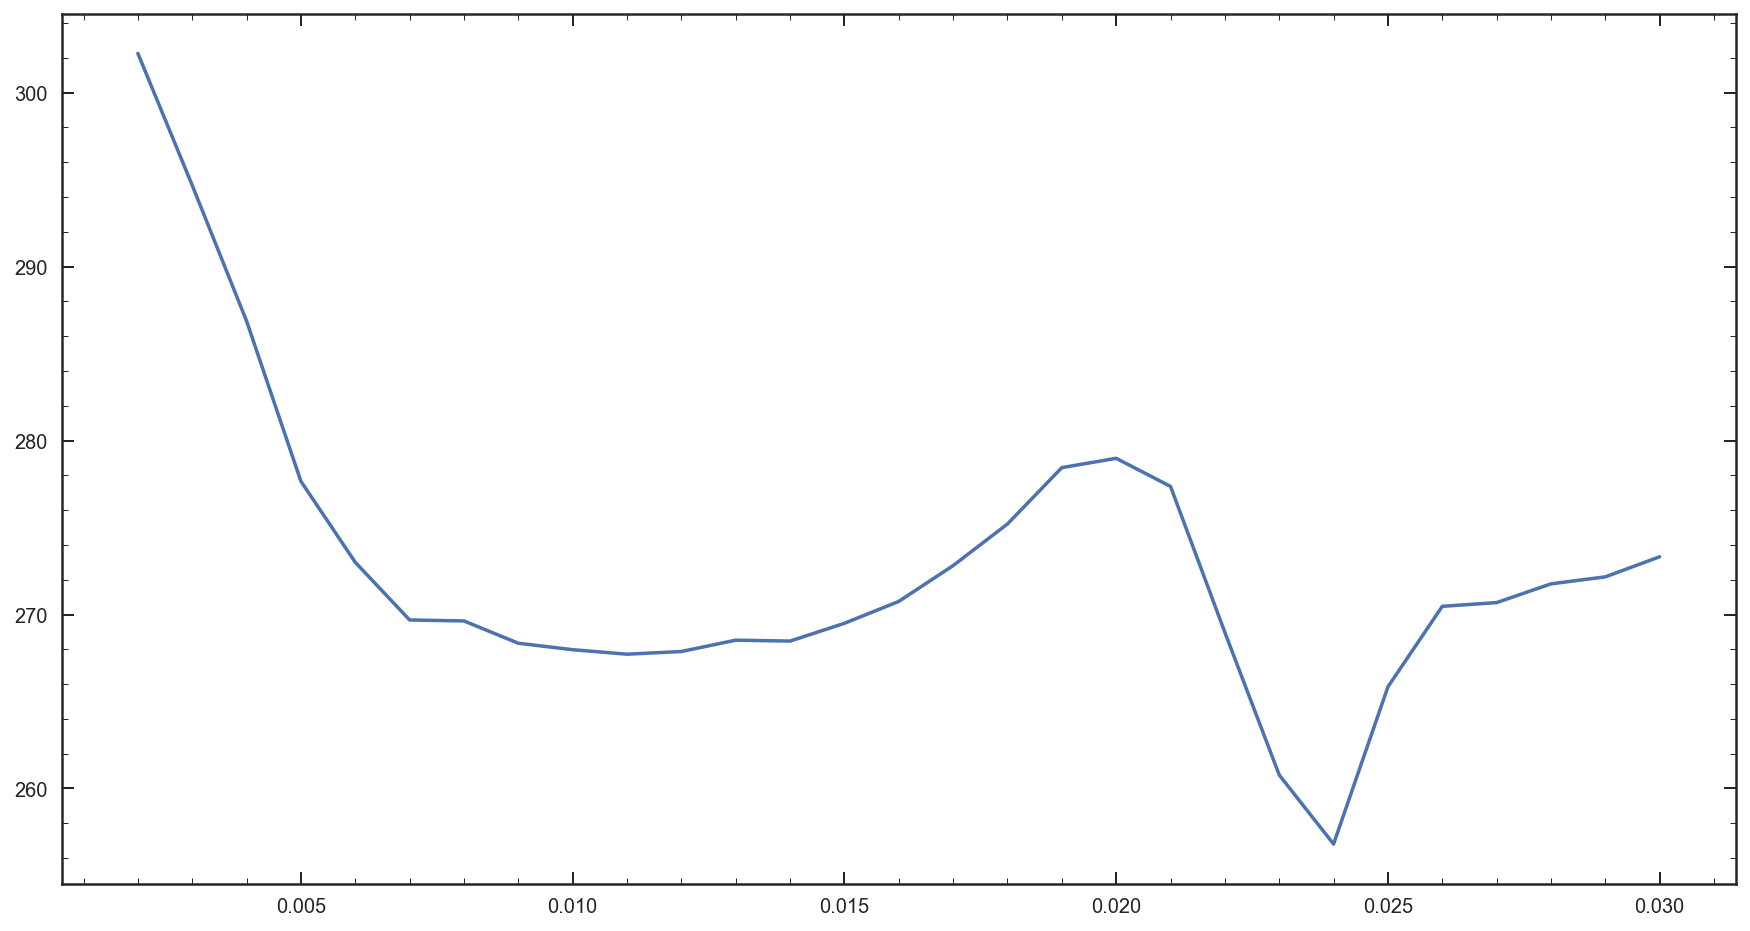

In [202]:
plt.figure(figsize=[15,8])
plt.plot(bfs.T[0],bfs.T[4])

In [212]:
sp  = Gen_spec('GSD',41520,1.608,'../beams/o173_4_41520.g102.A.fits','../beams/o230_41520.g141.A.fits',
               g102_lims=[8400,11300], g141_lims = [11100,16000],phot_tmp_err = True)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


In [211]:
bfs[0]

array([2.00000000e-03, 4.20000000e+00, 0.00000000e+00, 1.60900000e+00,
       3.02260295e+02, 6.00000000e-01])

In [236]:
Bchi = []
Rchi = []
Pchi = []

for i in range(len(bfs)):
    dt = bfs[i][2]
    if bfs[i][2] == 0:
        dt = int(0)

    sp.Sim_all(bfs[i][0], bfs[i][1], dt, model_redshift = bfs[i][3], Av = bfs[i][5])
    
    Bchi.append(((sp.Bflx - sp.Bmfl) / sp.Berr)**2)
    Rchi.append(((sp.Rflx - sp.Rmfl) / sp.Rerr)**2)
    Pchi.append(((sp.Pflx - sp.Pmfl) / sp.Perr)**2)
    

Text(5870,15,'Na')

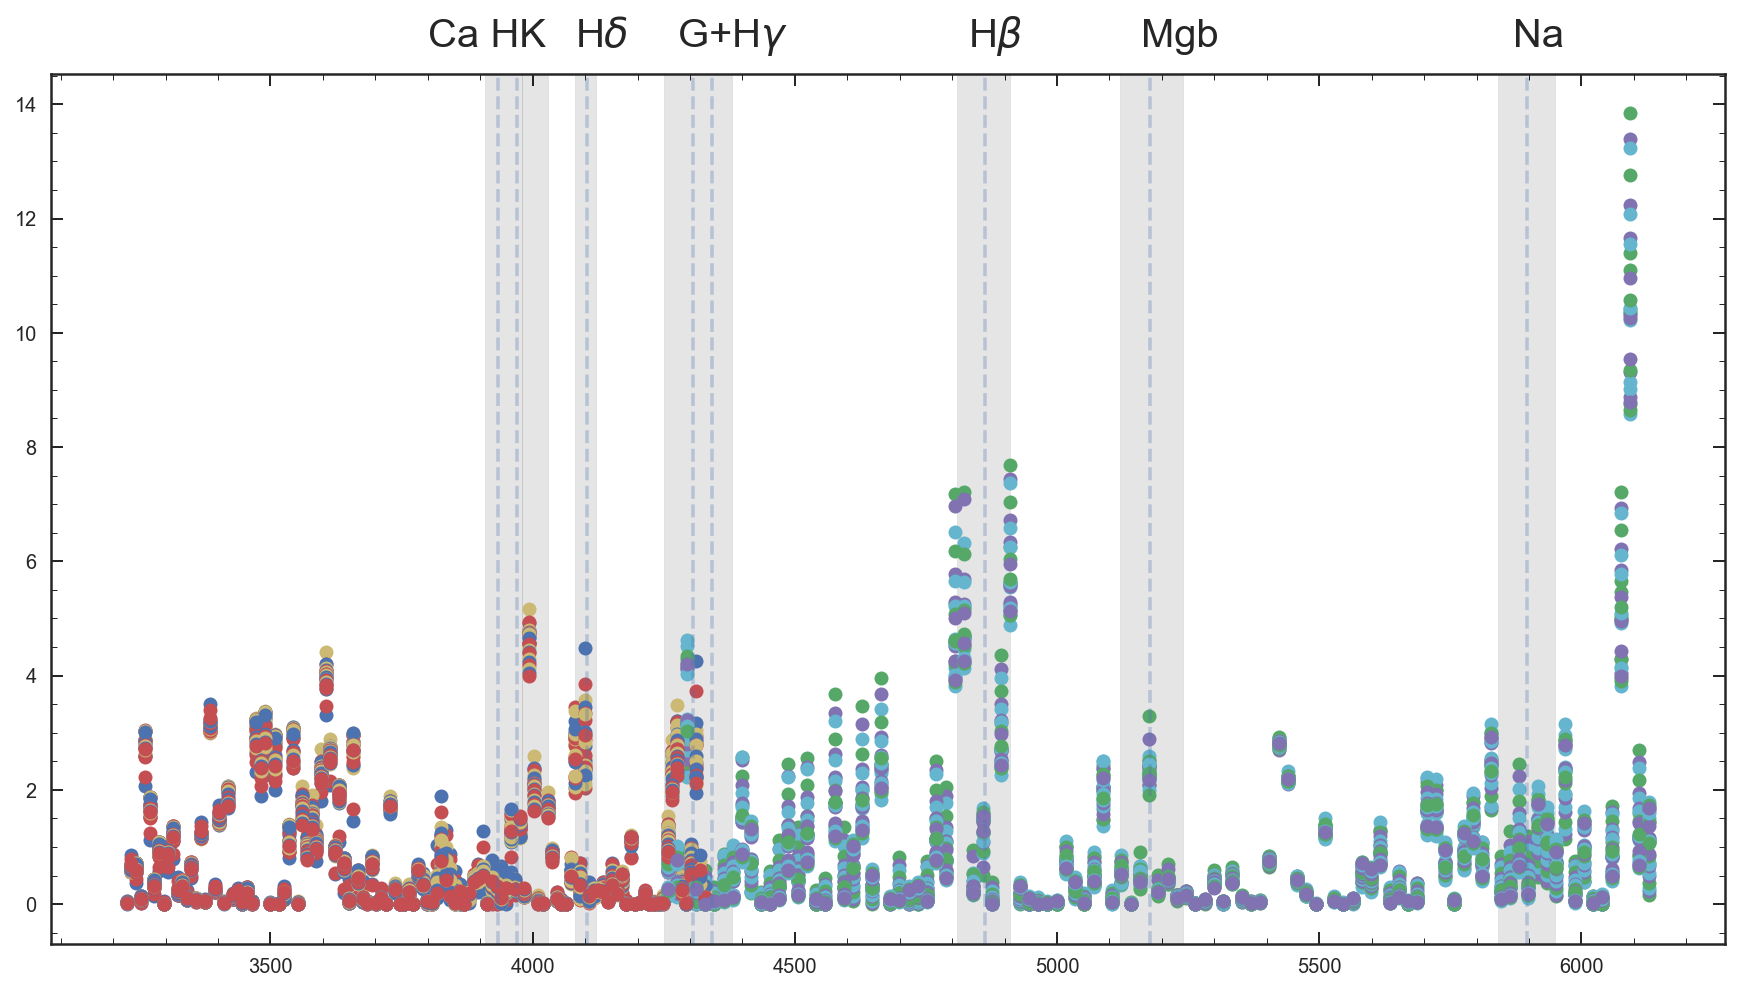

In [239]:
for i in range(len(Bchi)):
    plt.plot(sp.Bwv_rf,Bchi[i] - min(Bchi[i]),'o')
    plt.plot(sp.Rwv_rf,Rchi[i] - min(Rchi[i]),'o')
#     plt.plot(sp.Pwv_rf,Pchi[i],'o')   

plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvline(5895.6,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.axvspan(5840, 5950, color='k', alpha=.1)
plt.text(3800,15,'Ca HK',fontsize=20)
plt.text(4080,15,'H$\delta$',fontsize=20)
plt.text(4275,15,'G+H$\gamma$',fontsize=20)
plt.text(4830,15,'H$\\beta$',fontsize=20)
plt.text(5160,15,'Mgb',fontsize=20)
plt.text(5870,15,'Na',fontsize=20)

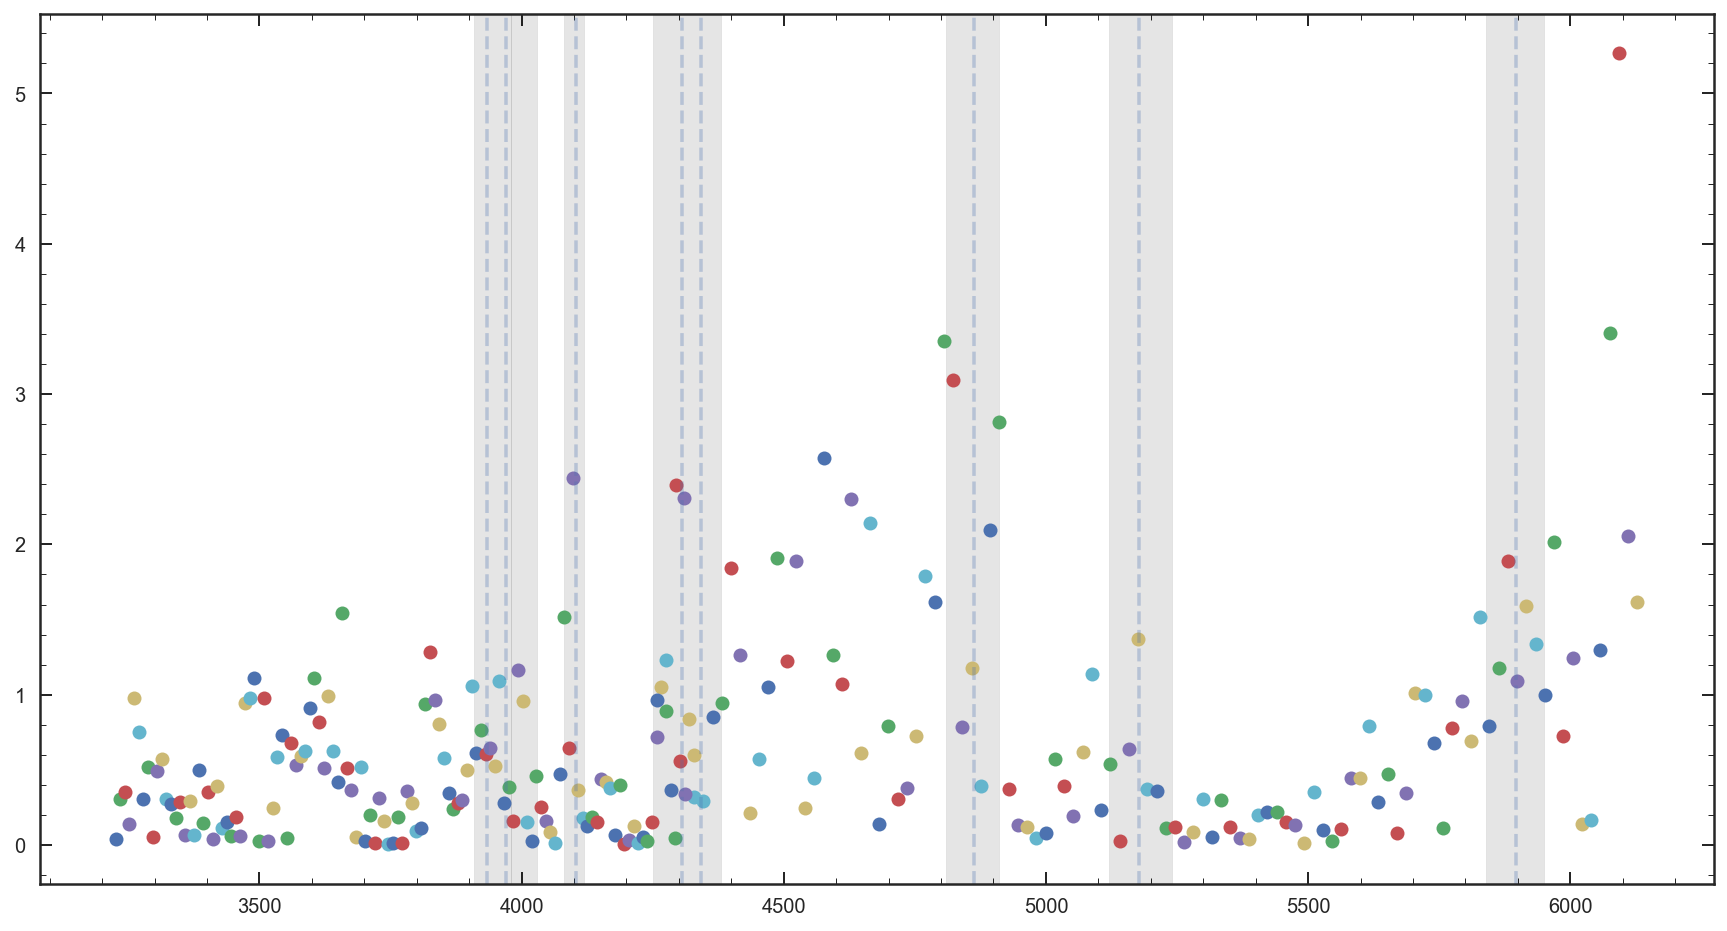

In [249]:
for i in range(len(sp.Bwv_rf)):
    plt.plot(sp.Bwv_rf[i],max(np.array(Bchi).T[i]) - min(np.array(Bchi).T[i]),'o')

for i in range(len(sp.Rwv_rf)):
    plt.plot(sp.Rwv_rf[i],max(np.array(Rchi).T[i]) - min(np.array(Rchi).T[i]),'o')

plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvline(5895.6,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.axvspan(5840, 5950, color='k', alpha=.1)
# plt.text(3800,15,'Ca HK',fontsize=20)
# plt.text(4080,15,'H$\delta$',fontsize=20)
# plt.text(4275,15,'G+H$\gamma$',fontsize=20)
# plt.text(4830,15,'H$\\beta$',fontsize=20)
# plt.text(5160,15,'Mgb',fontsize=20)
# plt.text(5870,15,'Na',fontsize=20)

In [294]:
def Bin(binsize, wv_array, array):
    bins = []
    bins_wv = []
    for i in range(len(array)//6):
        bins.append(np.median(array[i*binsize: (i+1)*binsize]))
        bins_wv.append(np.median(wv_array[i*binsize: (i+1)*binsize]))  
        
    return np.array(bins_wv), np.array(bins)

In [284]:
sp.Rwv_rf.size/5

21.4

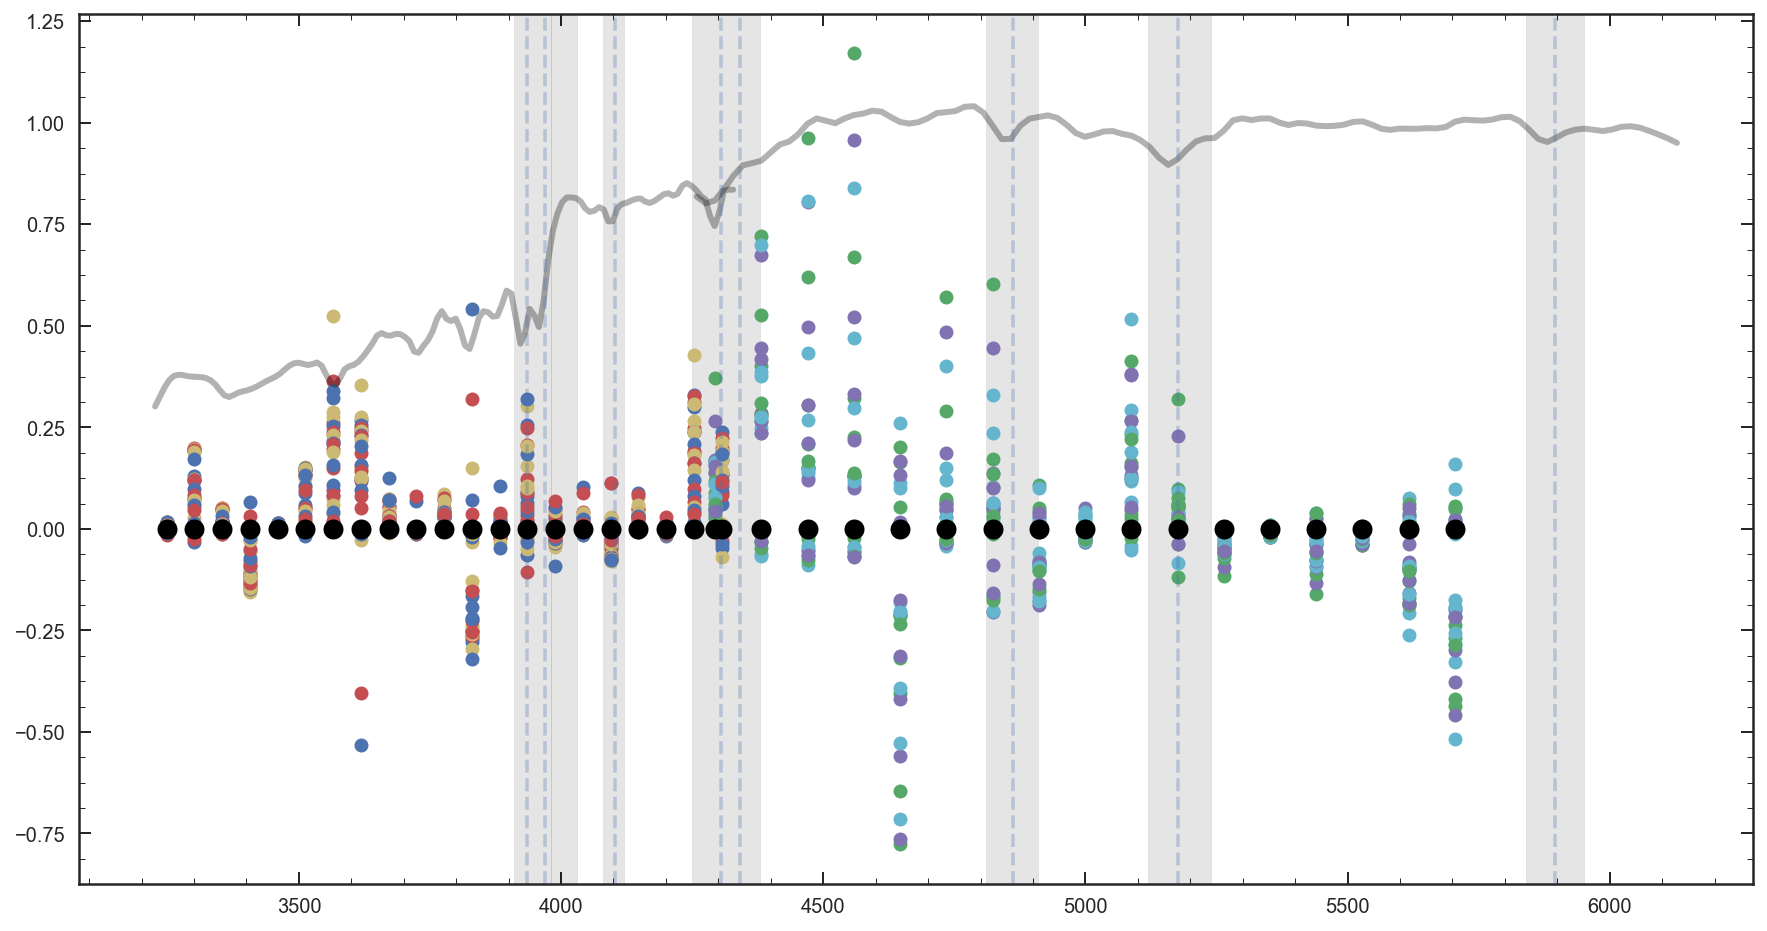

In [299]:
Bbin_wvbf, Bbinbf = Bin(6,sp.Bwv_rf, Bchi[22])
Rbin_wvbf, Rbinbf = Bin(5,sp.Rwv_rf, Rchi[22])
plt.plot(Bbin_wvbf,Bbinbf - Bbinbf,'ko',ms=10,zorder=10)
plt.plot(Rbin_wvbf,Rbinbf - Rbinbf,'ko',ms=10,zorder=10)

Rout = []
for i in range(len(Bchi)):
    Bbin_wv, Bbin = Bin(6,sp.Bwv_rf, Bchi[i])
    Rbin_wv, Rbin = Bin(5,sp.Rwv_rf, Rchi[i])
    Rout.append(Rbin)
    plt.plot(Bbin_wv,Bbin - Bbinbf,'o')
    plt.plot(Rbin_wv,Rbin- Rbinbf,'o')

plt.plot(sp.Bwv_rf,sp.Bmfl*1E18,'k',linewidth=3,alpha=.3)
plt.plot(sp.Rwv_rf,sp.Rmfl*1E18,'k',linewidth=3,alpha=.3)


plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvline(5895.6,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.axvspan(5840, 5950, color='k', alpha=.1)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


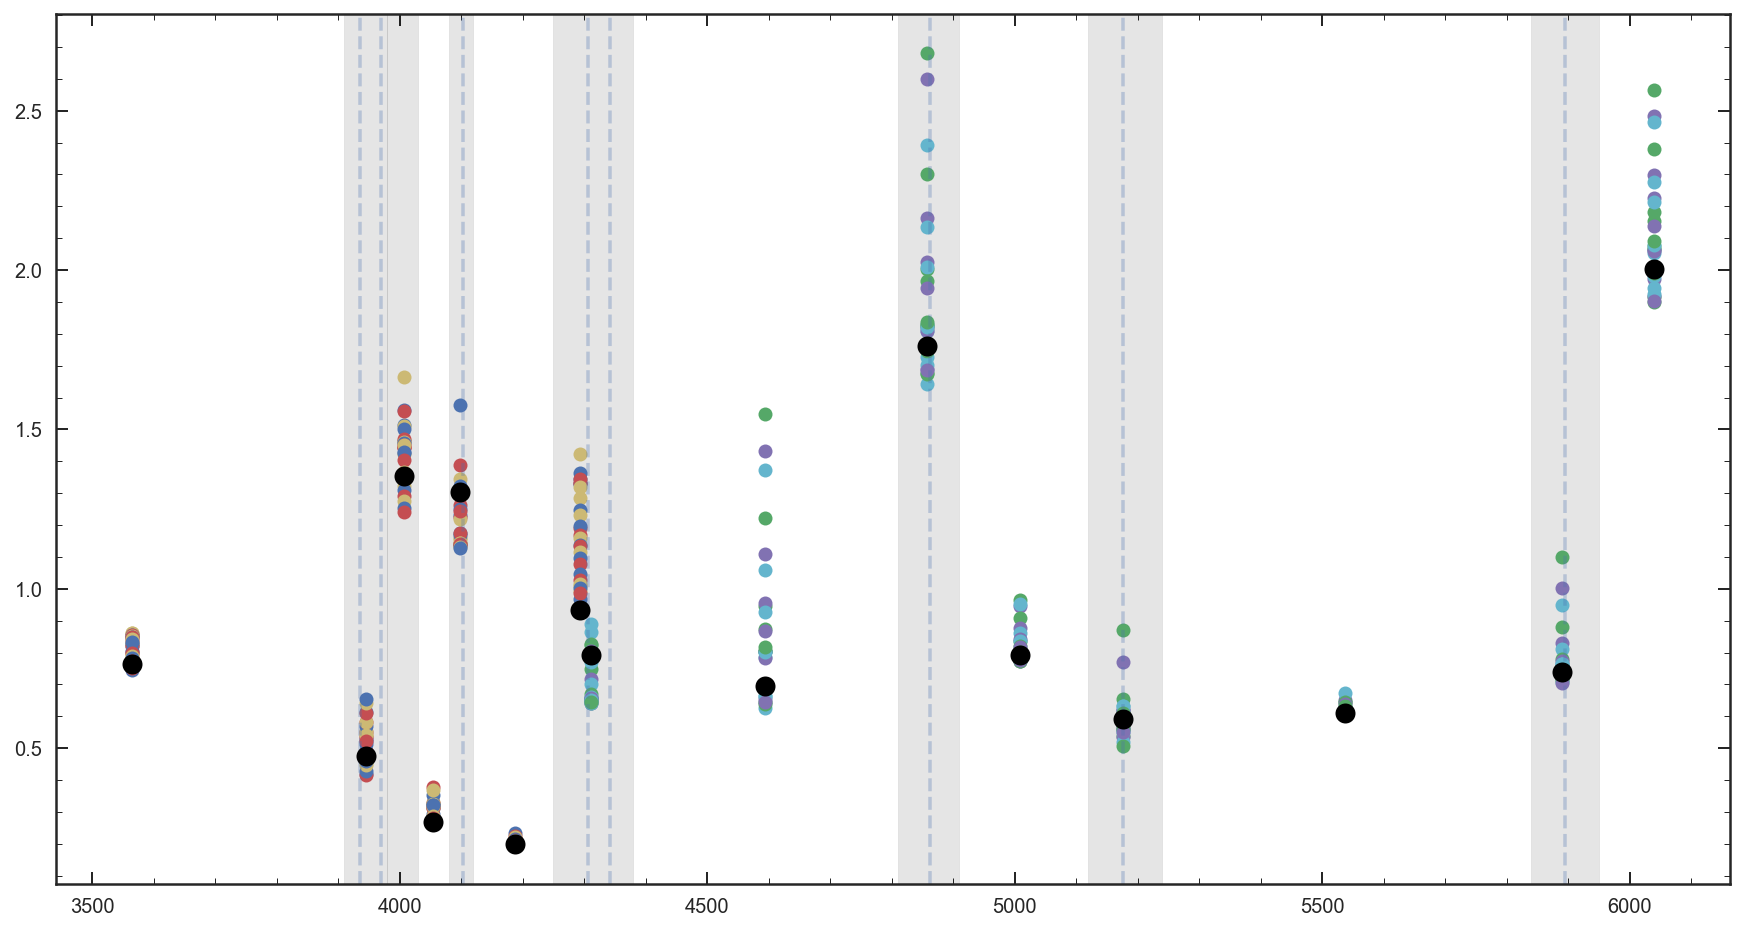

In [317]:
def Bin_reg(wv_array, array):
    lims = [3200,3910, 3980, 4030,4080, 4120,4250, 4380, 4810, 4910, 5120, 5240, 5840, 5950,6600]
    
    bins = []
    bins_wv = []
    
    for i in range(len(lims) - 1):
        range_wv = []
        range_fl = []
        
        for ii in range(len(array)):
            if lims[i] < wv_array[ii] < lims[i+1]:
                range_wv.append(wv_array[ii])
                range_fl.append(array[ii])
        
        bins.append(np.mean(range_fl))
        bins_wv.append(np.mean(range_wv)) 
        
    return np.array(bins_wv), np.array(bins)
Bout=[]
Rout=[]
for i in range(len(Bchi)):
    Bbin_wv, Bbin = Bin_reg(sp.Bwv_rf, Bchi[i])
    Rbin_wv, Rbin = Bin_reg(sp.Rwv_rf, Rchi[i])
    
    Bout.append(Bbin)
    Rout.append(Rbin)
    
    plt.plot(Bbin_wv,Bbin,'o')
    plt.plot(Rbin_wv,Rbin,'o')

Bbin_wvbf, Bbinbf = Bin_reg(sp.Bwv_rf, Bchi[22])
Rbin_wvbf, Rbinbf = Bin_reg(sp.Rwv_rf, Rchi[22])
plt.plot(Bbin_wvbf,Bbinbf,'ko',ms=10,zorder=10)
plt.plot(Rbin_wvbf,Rbinbf,'ko',ms=10,zorder=10)

plt.axvline(3934.777,linestyle='--', alpha=.3)
plt.axvline(3969.588,linestyle='--', alpha=.3)
plt.axvline(4102.89,linestyle='--', alpha=.3)
plt.axvline(4305.61,linestyle='--', alpha=.3)
plt.axvline(4341.68,linestyle='--', alpha=.3)
plt.axvline(4862.68,linestyle='--', alpha=.3)
plt.axvline(5176.7,linestyle='--', alpha=.3)
plt.axvline(5895.6,linestyle='--', alpha=.3)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(5120, 5240, color='k', alpha=.1)
plt.axvspan(5840, 5950, color='k', alpha=.1)

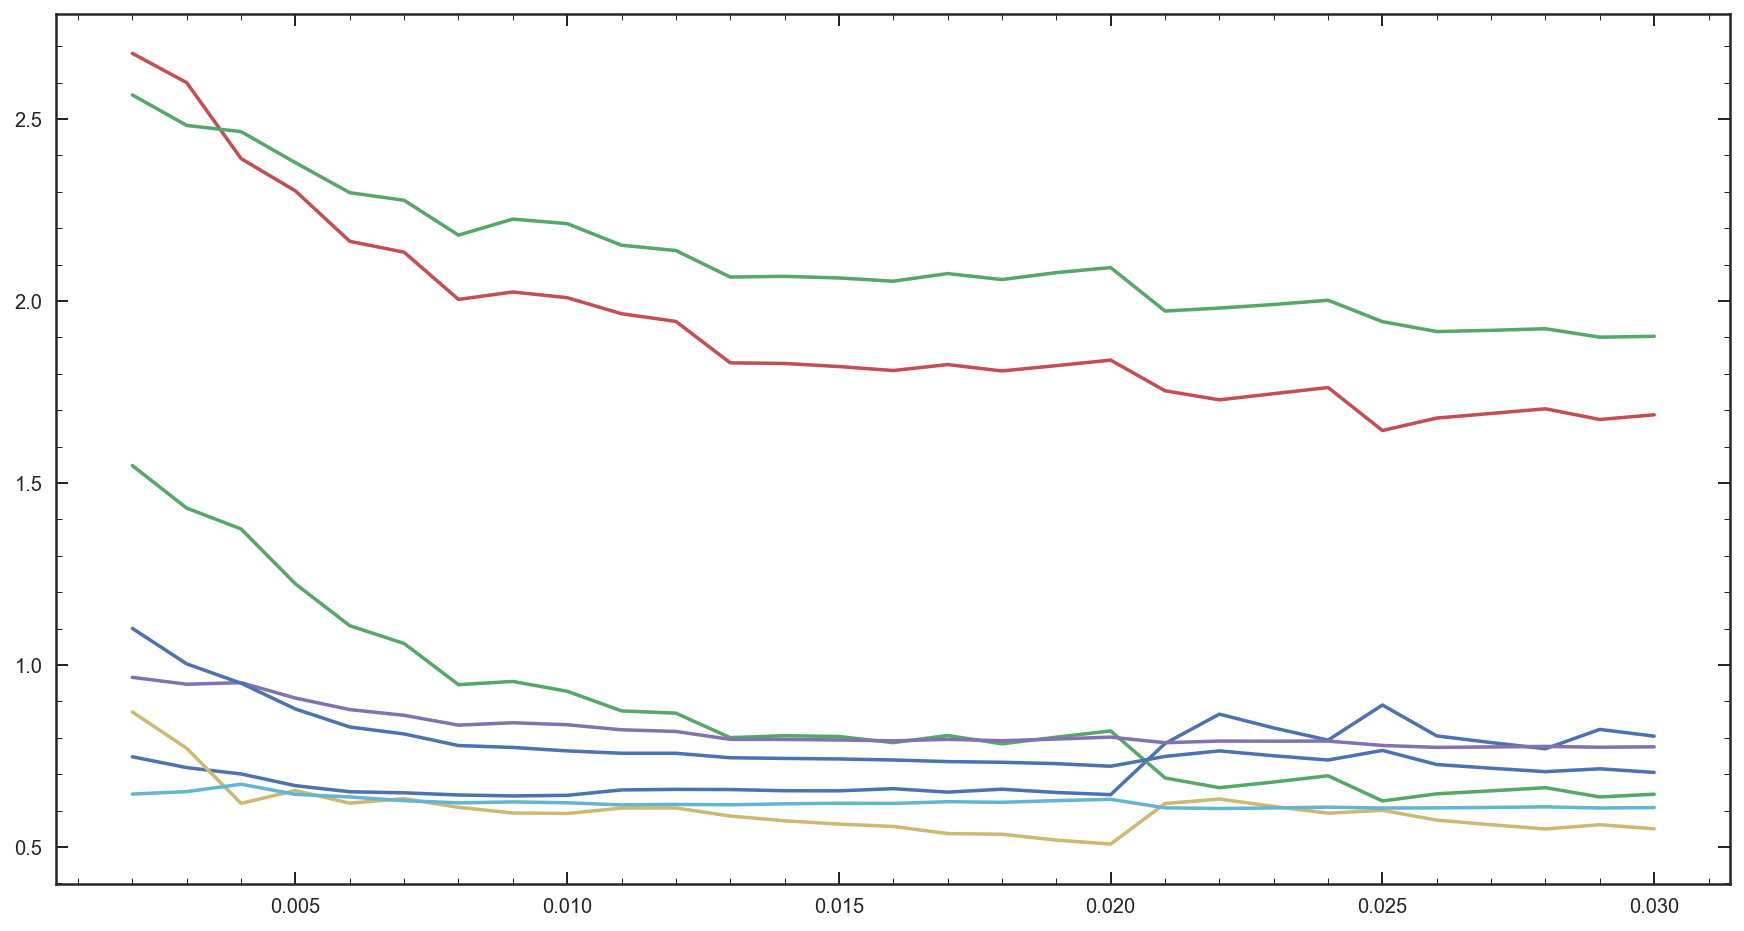

In [326]:
for i in range(len(np.array(Rout).T)):
    plt.plot(metal,np.array(Rout).T[i])

## Dust law

$A_{\lambda , \delta} = E(B − V ) k^{SB}_\lambda(λ/λ_V)^δ$

$\delta = (0.62 \pm 0.05) \log(E(B − V )) + 0.26 \pm 0.02$

$k_\lambda = A_\lambda / E(B − V )$

### Calzetti dustlaw

$cal = 10^{(-0.4 k A_v/R_v)}$

$k = 2.659(-2.156 +1.509/\lambda -0.198/\lambda^2 + 0.011/\lambda^3) + R_v$

$R_v = 4.05$

